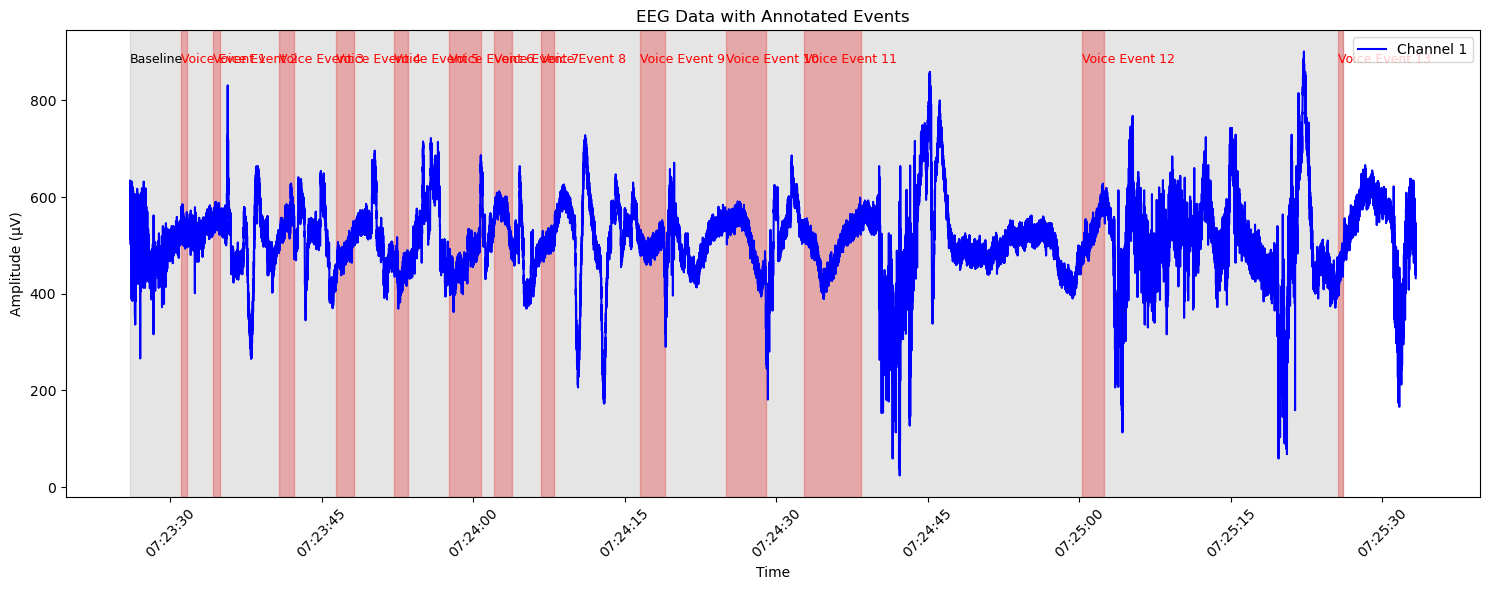

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Load EEG data
eeg_df = pd.read_csv('work/eeg_data.csv', parse_dates=['timestamp'])

# Load event log
log_df = pd.read_csv('work/baseline_log.csv', parse_dates=['timestamp'])

# Create a plot
fig, ax = plt.subplots(figsize=(15, 6))

# Plot EEG channels
ax.plot(eeg_df['timestamp'], eeg_df['ch1'], label='Channel 1', color='blue')
#ax.plot(eeg_df['timestamp'], eeg_df['ch2'], label='Channel 2', color='green')

# Identify and annotate voice events
voice_starts = log_df[log_df['event'] == 'voice_event_start']['timestamp'].reset_index(drop=True)
voice_ends = log_df[log_df['event'] == 'voice_event_end']['timestamp'].reset_index(drop=True)

for i, (start, end) in enumerate(zip(voice_starts, voice_ends), start=1):
    ax.axvspan(start, end, color='red', alpha=0.3)
    ax.text(start, ax.get_ylim()[1]*0.95, f'Voice Event {i}', color='red', fontsize=9, verticalalignment='top')

# Annotate baseline period
baseline_start = log_df[log_df['event'] == 'baseline_start']['timestamp'].values[0]
baseline_end = log_df[log_df['event'] == 'baseline_end']['timestamp'].values[0]
ax.axvspan(baseline_start, baseline_end, color='gray', alpha=0.2)
ax.text(baseline_start, ax.get_ylim()[1]*0.95, 'Baseline', color='black', fontsize=9, verticalalignment='top')

# Formatting the plot
ax.set_title('EEG Data with Annotated Events')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude (μV)')
ax.legend()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
